In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures

In [12]:
product_analysis = pd.read_csv('https://raw.githubusercontent.com/shiwen-9008/IS841-Team-Project/main/product_analysis_data_cleaning.csv', sep=',',encoding = "ISO-8859-1")

product_analysis_no_null=product_analysis[product_analysis['sum(price)'].notnull()]

product_analysis_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171650 entries, 0 to 172642
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   article_id                    171650 non-null  int64  
 1   product_code                  171650 non-null  int64  
 2   prod_name                     171650 non-null  object 
 3   product_type_no               171650 non-null  int64  
 4   product_type_name             171650 non-null  object 
 5   product_group_name            171650 non-null  object 
 6   graphical_appearance_no       171650 non-null  int64  
 7   graphical_appearance_name     171650 non-null  object 
 8   colour_group_code             171650 non-null  int64  
 9   colour_group_name             171650 non-null  object 
 10  perceived_colour_value_id     171650 non-null  int64  
 11  perceived_colour_value_name   171650 non-null  object 
 12  perceived_colour_master_id    171650 non-nul

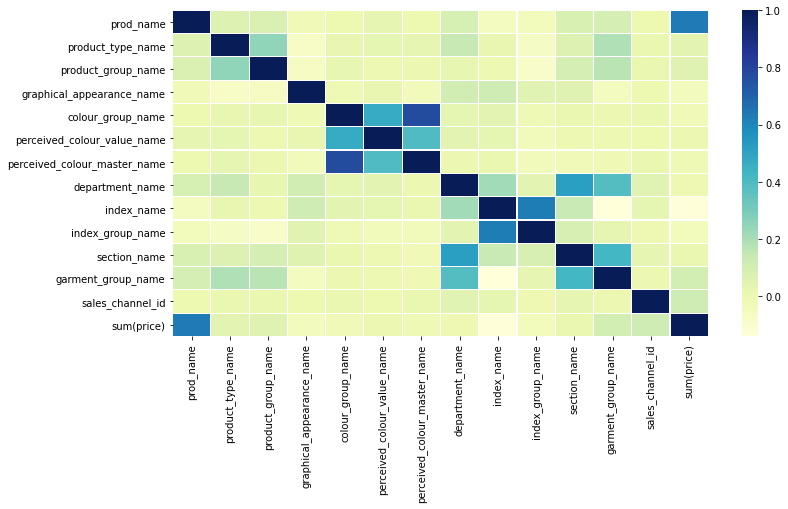

In [13]:
product_analysis_2 = product_analysis_no_null
plt.figure(figsize=(12, 6))
stroke_corr=product_analysis_2.drop(['article_id', 'product_code', 'product_type_no', 'graphical_appearance_no', 'colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id', 'department_no', 'index_code',
'index_group_no','section_no','garment_group_no','detail_desc'],axis=1, inplace=True)
corr = product_analysis_2.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                 linewidths=.2, cmap="YlGnBu")

In [14]:
product_analysis_no_null['product_type_name'].value_counts()

Trousers         18509
Dress            17675
Sweater          15449
T-shirt          12546
Top               6865
                 ...  
Headband             2
Cushion              2
Washing bag          1
Clothing mist        1
Blanket              1
Name: product_type_name, Length: 130, dtype: int64

In [15]:
product_analysis_no_null['product_group_name'].value_counts()

Garment Upper body       69924
Garment Lower body       32791
Garment Full body        21910
Accessories              17144
Underwear                 9289
Shoes                     8106
Swimwear                  5512
Socks & Tights            3695
Nightwear                 2858
Unknown                    191
Cosmetic                    73
Underwear/nightwear         57
Bags                        47
Items                       16
Furniture                   13
Garment and Shoe care       11
Interior textile             5
Stationery                   5
Fun                          3
Name: product_group_name, dtype: int64

In [16]:
product_analysis_no_null['graphical_appearance_name'].value_counts()

Solid                  81838
All over pattern       27239
Melange                 9702
Denim                   8249
Stripe                  8095
Front print             4880
Placement print         4829
Check                   3659
Colour blocking         2961
Lace                    2674
Other structure         2502
Application/3D          2101
Embroidery              1958
Glittering/Metallic     1512
Mixed solid/pattern     1500
Jacquard                1378
Sequin                  1322
Dot                     1112
Treatment                921
Other pattern            808
Contrast                 628
Metallic                 530
Chambray                 503
Slub                     229
Mesh                     154
Transparent              126
Neps                     120
Unknown                   87
Argyle                    24
Hologram                   9
Name: graphical_appearance_name, dtype: int64

In [17]:
product_analysis_no_null['perceived_colour_value_name'].value_counts()

Dark            70090
Dusty Light     35663
Light           25640
Medium Dusty    20653
Bright          10195
Medium           9199
Undefined         161
Unknown            49
Name: perceived_colour_value_name, dtype: int64

In [14]:
product_analysis_no_null['colour_group_name'].value_counts()

Black              38202
Dark Blue          19073
White              15986
Light Pink          9011
Grey                6948
Light Beige         5640
Blue                5483
Light Blue          5013
Red                 4901
Off White           4604
Beige               4585
Greenish Khaki      4505
Dark Grey           4342
Dark Red            3820
Dark Green          3429
Light Grey          3335
Pink                3267
Yellow              2713
Light Orange        2446
Yellowish Brown     2401
Gold                2245
Dark Beige          1781
Light Yellow        1587
Light Turquoise     1492
Dark Orange         1438
Dark Pink           1352
Orange              1263
Green               1248
Other Pink          1133
Light Green         1068
Silver              1041
Dark Yellow          897
Light Purple         859
Dark Turquoise       749
Turquoise            668
Dark Purple          483
Light Red            446
Other Yellow         356
Greyish Beige        347
Purple               285


In [18]:
product_analysis_no_null['perceived_colour_master_name'].value_counts()

Black              38031
Blue               29544
White              21150
Pink               14675
Grey               13995
Beige               9597
Red                 9489
Green               5591
Khaki green         5170
Yellow              5088
Orange              4430
Brown               3710
Metal               3432
Turquoise           2751
Mole                1950
Lilac Purple        1711
Unknown             1161
undefined            161
Yellowish Green        9
Bluish Green           5
Name: perceived_colour_master_name, dtype: int64

In [19]:
product_analysis_no_null['department_name'].value_counts()

Jersey                             7956
Knitwear                           6027
Trouser                            4776
Blouse                             4297
Swimwear                           3948
                                   ... 
EQ Divided Blue                       2
Baby Boy Local Relevance              2
Accessories Other                     2
Kids Boy License                      1
Shirt Extended inactive from s1       1
Name: department_name, Length: 250, dtype: int64

In [20]:
product_analysis_no_null['garment_group_name'].value_counts()

Jersey Fancy                     34769
Accessories                      17729
Jersey Basic                     12879
Knitwear                         12335
Under-, Nightwear                12157
Trousers                         11468
Blouses                          10378
Dresses Ladies                    8769
Shoes                             7909
Outdoor                           7042
Unknown                           5735
Trousers Denim                    5237
Swimwear                          4999
Shirts                            3549
Socks and Tights                  3472
Woven/Jersey/Knitted mix Baby     2736
Shorts                            2687
Dresses/Skirts girls              2309
Skirts                            2304
Special Offers                    1614
Dressed                           1573
Name: garment_group_name, dtype: int64

In [18]:
product_analysis_no_null['section_name'].value_counts()

Womens Everyday Collection        13265
Divided Collection                12769
Baby Essentials & Complements      6533
Kids Girl                          6442
Womens Lingerie                    6403
Womens Tailoring                   6098
Young Girl                         5883
Womens Small accessories           5070
Girls Underwear & Basics           5011
Kids Boy                           4873
Womens Casual                      4869
Womens Trend                       4714
Divided Projects                   3900
H&M+                               3897
Men Underwear                      3822
Kids Outerwear                     3778
Mama                               3759
Young Boy                          3687
Womens Shoes                       3591
Womens Swimwear, beachwear         3546
Ladies H&M Sport                   3401
Contemporary Smart                 3071
Divided Basics                     3046
Kids & Baby Shoes                  2948
Womens Everyday Basics             2917


In [21]:
product_analysis_no_null.columns

Index(['prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'index_group_name', 'section_name',
       'garment_group_name', 'sales_channel_id', 'sum(price)'],
      dtype='object')

In [22]:
dummies = pd.get_dummies(product_analysis_no_null,columns=['product_type_name','graphical_appearance_name','perceived_colour_master_name','garment_group_name','index_group_name','sales_channel_id']) 

In [23]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171650 entries, 0 to 172642
Columns: 216 entries, prod_name to sales_channel_id_2.0
dtypes: float64(1), object(7), uint8(208)
memory usage: 45.8+ MB


In [26]:
dummies.columns

Index(['sum(price)', 'product_type_name_Accessories set',
       'product_type_name_Alice band', 'product_type_name_Baby Bib',
       'product_type_name_Backpack', 'product_type_name_Bag',
       'product_type_name_Ballerinas', 'product_type_name_Beanie',
       'product_type_name_Belt', 'product_type_name_Bikini top',
       ...
       'garment_group_name_Under-, Nightwear', 'garment_group_name_Unknown',
       'garment_group_name_Woven/Jersey/Knitted mix Baby',
       'index_group_name_Baby/Children', 'index_group_name_Divided',
       'index_group_name_Ladieswear', 'index_group_name_Menswear',
       'index_group_name_Sport', 'sales_channel_id_1.0',
       'sales_channel_id_2.0'],
      dtype='object', length=209)

In [25]:
dummies.drop([ 'prod_name', 'product_group_name','colour_group_name', 'perceived_colour_value_name', 'department_name', 'section_name','index_name'],axis=1, inplace=True)

In [49]:
X = dummies.drop('sum(price)', axis = 1)
y= dummies['sum(price)']

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(dummies,y,test_size=0.4,random_state=833)

In [57]:
X.columns

Index(['product_type_name_Accessories set', 'product_type_name_Alice band',
       'product_type_name_Baby Bib', 'product_type_name_Backpack',
       'product_type_name_Bag', 'product_type_name_Ballerinas',
       'product_type_name_Beanie', 'product_type_name_Belt',
       'product_type_name_Bikini top', 'product_type_name_Blanket',
       ...
       'garment_group_name_Under-, Nightwear', 'garment_group_name_Unknown',
       'garment_group_name_Woven/Jersey/Knitted mix Baby',
       'index_group_name_Baby/Children', 'index_group_name_Divided',
       'index_group_name_Ladieswear', 'index_group_name_Menswear',
       'index_group_name_Sport', 'sales_channel_id_1.0',
       'sales_channel_id_2.0'],
      dtype='object', length=208)

In [51]:
model = LinearRegression(fit_intercept=True)                  
model.fit(xtrain, ytrain)
y_fit=   model.predict(xtrain)               
y_model = model.predict(xtest)
print(mean_squared_error(ytrain, y_fit),
mean_squared_error(ytest, y_model))

2.4459617148372654e-16 2.4837327593308187e-16


In [71]:
Linear_coeff=pd.DataFrame({'feature_name': xtrain.columns,'model_coefficient':model.coef_.transpose().flatten()})
pd.set_option('max_rows',None)
Linear_coeff

,feature_name,model_coefficient
0,sum(price),1.000000e+06
1,product_type_name_Accessories set,2.224289e-08
2,product_type_name_Alice band,2.776195e-09
3,product_type_name_Baby Bib,1.473096e-08
4,product_type_name_Backpack,-1.736101e-10
5,product_type_name_Bag,-8.183024e-10
6,product_type_name_Ballerinas,4.866212e-10
7,product_type_name_Beanie,4.417263e-09
8,product_type_name_Belt,-3.972004e-10
9,product_type_name_Bikini top,-4.047041e-10


In [53]:
pipe = make_pipeline( StandardScaler(with_mean=False),\
                      LassoCV(n_alphas=20,  max_iter=10000, cv=5));
pipe.fit(xtrain, ytrain)
alpha_tune=pipe['lassocv'].alpha_
y_fit=   model.predict(xtrain) 
y_model = pipe.predict(xtest) 
print(mean_squared_error(ytrain, y_fit),
mean_squared_error(ytest, y_model))

2.4459617148372654e-16 210859330.0535196


In [54]:
alpha_tune=pipe['lassocv'].alpha_
alpha_tune

14515.313936647251

In [55]:
Lasso_coeff=pd.DataFrame({'feature_name': xtrain.columns,'model_coefficient':pipe['lassocv'].coef_.transpose().flatten()})
pd.set_option('max_rows',None)
pd.DataFrame(Lasso_coeff)

,feature_name,model_coefficient
0,sum(price),1.450080e+07
1,product_type_name_Accessories set,-0.000000e+00
2,product_type_name_Alice band,-0.000000e+00
3,product_type_name_Baby Bib,-0.000000e+00
4,product_type_name_Backpack,0.000000e+00
...,...,...
204,index_group_name_Ladieswear,0.000000e+00
205,index_group_name_Menswear,-0.000000e+00
206,index_group_name_Sport,0.000000e+00
207,sales_channel_id_1.0,-0.000000e+00


In [67]:
pd.set_option('max_rows',None)
pd.DataFrame(Lasso_coeff)

,feature_name,model_coefficient
0,sum(price),1.450080e+07
1,product_type_name_Accessories set,-0.000000e+00
2,product_type_name_Alice band,-0.000000e+00
3,product_type_name_Baby Bib,-0.000000e+00
4,product_type_name_Backpack,0.000000e+00
5,product_type_name_Bag,-0.000000e+00
6,product_type_name_Ballerinas,-0.000000e+00
7,product_type_name_Beanie,-0.000000e+00
8,product_type_name_Belt,-0.000000e+00
9,product_type_name_Bikini top,0.000000e+00
